<a href="https://colab.research.google.com/github/Raijin-ZD/BikeShareEDA/blob/main/InternMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#get colors from an image
from PIL import Image
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

In [ ]:
data = pd.read_csv("/content/2019-fordgobike-San Franscisco.csv")


In [ ]:
data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
data.info()
print(len(data)) #prints rows
print(len(data.columns))#prints cols
#183412 row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Issues Found

*   Missing values for start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender
*Incorrect Data type for start_time, end_time, station_start_id, end_station_id, member_birth_year features


In [ ]:
# convert start_time and end_time into datetime
data.start_time = pd.to_datetime(data.start_time)
data.end_time = pd.to_datetime(data.end_time)

# convert start_station_id, end_station_id, and bike_id into strings
data.start_station_id = data.start_station_id.astype('str')
data.end_station_id = data.end_station_id.astype('str')
data.bike_id = data.bike_id.astype('str')

# convert user_type and member_gender into categories
data.user_type = data.user_type.astype('category')
data.member_gender = data.member_gender.astype('category')

Further checkup
* Looking for min duration further checkup

In [ ]:
data[data.duration_sec == 61]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
18578,61,2019-02-26 18:23:44.283,2019-02-26 18:24:45.523,368.0,Myrtle St at Polk St,37.785434,-122.419622,368.0,Myrtle St at Polk St,37.785434,-122.419622,5333,Subscriber,1989.0,Female,No
19581,61,2019-02-26 16:40:53.121,2019-02-26 16:41:54.451,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5306,Subscriber,1987.0,Female,No
27017,61,2019-02-25 10:31:18.415,2019-02-25 10:32:19.748,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5921,Subscriber,1972.0,Male,Yes
44301,61,2019-02-22 15:09:57.048,2019-02-22 15:10:58.742,310.0,San Fernando St at 4th St,37.335885,-121.885660,280.0,San Fernando St at 7th St,37.337122,-121.883215,6347,Subscriber,1989.0,Male,Yes
44787,61,2019-02-22 13:56:21.976,2019-02-22 13:57:23.465,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,81.0,Berry St at 4th St,37.775880,-122.393170,6150,Subscriber,1931.0,Male,No
51120,61,2019-02-21 18:27:34.993,2019-02-21 18:28:36.630,113.0,Franklin Square,37.764555,-122.410345,100.0,Bryant St at 15th St,37.767100,-122.410662,6515,Subscriber,1984.0,Male,No
58992,61,2019-02-20 21:44:00.154,2019-02-20 21:45:01.235,85.0,Church St at Duboce Ave,37.770083,-122.429156,85.0,Church St at Duboce Ave,37.770083,-122.429156,4351,Subscriber,1994.0,Male,No
64088,61,2019-02-20 13:08:18.285,2019-02-20 13:09:19.433,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,-122.397437,2090,Subscriber,1931.0,Male,No
80047,61,2019-02-18 16:31:12.896,2019-02-18 16:32:14.588,89.0,Division St at Potrero Ave,37.769218,-122.407646,101.0,15th St at Potrero Ave,37.767079,-122.407359,6195,Subscriber,1931.0,Male,No
82564,61,2019-02-18 09:53:31.399,2019-02-18 09:54:33.162,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,3054,Subscriber,1990.0,Male,No


In [ ]:
#is the memeber birthyear and gender only for subs or not
data[data.user_type == 'Customer'].member_birth_year.value_counts()

1989.0    1074
1988.0     943
1990.0     885
1991.0     828
1987.0     815
          ... 
1947.0       2
1878.0       1
1944.0       1
1928.0       1
1930.0       1
Name: member_birth_year, Length: 62, dtype: int64

In [ ]:
#seeing if the gender is only for subscribers
data[data.user_type == 'Customer'].member_gender.value_counts()

Male      11529
Female     4647
Other       455
Name: member_gender, dtype: int64

* checking if there is any row dublicates in the data

In [ ]:
#dublicates ?
data.duplicated().sum()

0

In [ ]:
print(list(data.columns))

['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']


In [ ]:
print(data.describe())


        duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  
count         183412.000000          183412.000000      175147.000000  
mean              37.771427            -122.352250        1984.806437  
std                0.099490               0.116673          10.116689  
min               37.317298            -122.453704    

In [ ]:
data.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [ ]:
# Percent of missing values in each column i found this online so i loved to use it -<>-
(data.isna().sum() / data.shape[0]) * 100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.000000
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.000000
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

Adding cols that i will need in my visulaization later

In [ ]:
data[data["start_station_name"].isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,nan,NaN,37.40,-121.94,nan,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,nan,NaN,37.40,-121.94,nan,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,nan,NaN,37.41,-121.95,nan,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,nan,NaN,37.39,-121.93,nan,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,nan,NaN,37.40,-121.92,nan,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes


# **Cleaning**

Filling the null station names with mode they are 0.10 percent of the data

In [ ]:
#columns_to_fillnum = ['start_station_id', 'end_station_id']
#columns_to_fillstr = [ 'start_station_name','end_station_name']
# Fill null values in the specified columns with 'unknown'
#data[columns_to_fillnum] = data[columns_to_fillnum].fillna(0)
#data[columns_to_fillstr] = data[columns_to_fillstr].fillna("unknown")
for col in ["start_station_name", "end_station_name","member_birth_year"]:
  data[col] = data[col].fillna(data[col].mode()[0])

getting rid of any outlires in the birth_year col

In [ ]:
# droping Age > 90
data.drop(data[(data.member_birth_year < 1929 )].index, inplace = True)

In [ ]:
data.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000
mean,726.111806,37.771210,-122.352662,37.771414,-122.352249,1984.985311
std,1794.741340,0.099599,0.117111,0.099507,0.116689,9.761477
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1930.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1981.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1988.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


age as a number will be better for analysis

In [ ]:
data['Age'] = 2019 - data.member_birth_year
data.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,Age
count,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000
mean,726.111806,37.771210,-122.352662,37.771414,-122.352249,1984.985311,34.014689
std,1794.741340,0.099599,0.117111,0.099507,0.116689,9.761477,9.761477
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1930.000000,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1981.000000,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1988.000000,31.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,38.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,89.000000


seeing if the birthyear

In [ ]:
nullrow = data[data["member_birth_year"].isnull()]
nullrow.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age


In [ ]:
unique_bike_count = data['bike_id'].nunique()

print(f"Number of unique bikes: {unique_bike_count}")

Number of unique bikes: 4646


130651 / 175147 ≈ 0.746
40844 / 175147 ≈ 0.233
3652 / 175147 ≈ 0.021



*   Male: 8265 * 0.746 ≈ 6167

*   Female: 8265 * 0.233 ≈ 1924
*Other: 8265 * 0.021 ≈ 174

These values maintain the same ratio as the original numbers.

In [ ]:
data['member_gender'].fillna('Male', limit=6167, inplace=True)

# Replace 1924 null values with 'female'
data['member_gender'].fillna('Female', limit=1924, inplace=True)

# Replace 174 null values with 'other'
data['member_gender'].fillna('Other', limit=174, inplace=True)

# Print the updated counts
updated_gender_counts = data['member_gender'].value_counts()
print(updated_gender_counts)
#I dealt with the null values in gender to make them the same ratio as they were before

Male      136757
Female     42754
Other       3824
Name: member_gender, dtype: int64


i tried to make a model to predict birth year but the mse was too high

In [ ]:
"""import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#i tried using the bike_share_for_all_trip but it gave me error even after encoding and i looked for it for an hour and didnt know the cause
selected_features = ['member_gender','user_type']

# train data and predict data the train data is not null and the predict is null
train_data = data[~data['member_birth_year'].isnull()]
predict_data = data[data['member_birth_year'].isnull()]
# X is features and y is target col to predict
X = train_data[selected_features]
y = train_data['member_birth_year']


# Use pd.get_dummies to one-hot encode the selected categorical features
X_encoded = pd.get_dummies(X, columns=['member_gender', 'user_type'])


model = LinearRegression()

X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


# Predict birth years on the validation set
y_pred = model.predict(X_valid)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error:", mse)


X_predict = predict_data[selected_features]
X_predict_encoded = pd.get_dummies(X_predict, columns=['member_gender', 'user_type'])
predicted_birth_years = model.predict(X_predict_encoded)


# Replace the missing birth year values in the original DataFrame with the predicted values
data.loc[data['member_birth_year'].isnull(), 'member_birth_year'] = predicted_birth_years

data['member_birth_year'] = data['member_birth_year'].apply(lambda x: max(x, 0))

"""

'import pandas as pd\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\n\n#i tried using the bike_share_for_all_trip but it gave me error even after encoding and i looked for it for an hour and didnt know the cause\nselected_features = [\'member_gender\',\'user_type\']\n\n# train data and predict data the train data is not null and the predict is null\ntrain_data = data[~data[\'member_birth_year\'].isnull()]\npredict_data = data[data[\'member_birth_year\'].isnull()]\n# X is features and y is target col to predict\nX = train_data[selected_features]\ny = train_data[\'member_birth_year\']\n\n\n# Use pd.get_dummies to one-hot encode the selected categorical features\nX_encoded = pd.get_dummies(X, columns=[\'member_gender\', \'user_type\'])\n\n\nmodel = LinearRegression()\n\nX_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size=0.2, random_state=42)\n\nmodel.fit(X_t

In [ ]:
data['Age'].unique()

array([35., 31., 47., 30., 45., 60., 36., 27., 23., 26., 29., 38., 44.,
       41., 28., 22., 33., 19., 37., 24., 39., 46., 34., 48., 40., 52.,
       21., 25., 42., 20., 32., 50., 56., 43., 55., 54., 58., 51., 53.,
       57., 65., 61., 59., 49., 63., 62., 74., 67., 71., 68., 78., 69.,
       70., 66., 64., 73., 72., 88., 76., 77., 86., 18., 75., 85., 80.,
       89., 81.])

In [ ]:
"""def raijin_round(x):
  ##  dec = x - int(x)
  #  if dec >= 0.5:
        return int(x) + 1
    else:
        return int(x)

data['member_birth_year'] = data['member_birth_year'].apply(raijin_round)
data['member_birth_year'].unique()
"""

"def raijin_round(x):\n  ##  dec = x - int(x)\n  #  if dec >= 0.5:\n        return int(x) + 1\n    else:\n        return int(x)\n\ndata['member_birth_year'] = data['member_birth_year'].apply(raijin_round)\ndata['member_birth_year'].unique()\n"

In [ ]:
gender_counts = data['member_gender'].value_counts()
print(gender_counts)


Male      136757
Female     42754
Other       3824
Name: member_gender, dtype: int64


------------------------------------


making 4 cols out of start time for analysis and viuslaization

In [ ]:
# add new columns for trip duration in minute, hour of the day, day of week and month

data['duration_minute'] = data['duration_sec']/60
data['start_date'] = data.start_time.dt.strftime('%Y-%m-%d')
data['start_hourofday'] = data.start_time.dt.strftime('%H')
data['start_dayofweek'] = data.start_time.dt.strftime('%A')
data['start_month'] = data.start_time.dt.strftime('%B')

data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,1988.0,Male,No,31.0,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,26.416667,2019-02-28,23,Thursday,February


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183335 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183335 non-null  int64         
 1   start_time               183335 non-null  datetime64[ns]
 2   end_time                 183335 non-null  datetime64[ns]
 3   start_station_id         183335 non-null  object        
 4   start_station_name       183335 non-null  object        
 5   start_station_latitude   183335 non-null  float64       
 6   start_station_longitude  183335 non-null  float64       
 7   end_station_id           183335 non-null  object        
 8   end_station_name         183335 non-null  object        
 9   end_station_latitude     183335 non-null  float64       
 10  end_station_longitude    183335 non-null  float64       
 11  bike_id                  183335 non-null  object        
 12  user_type       

Trying to see if there is any outliers

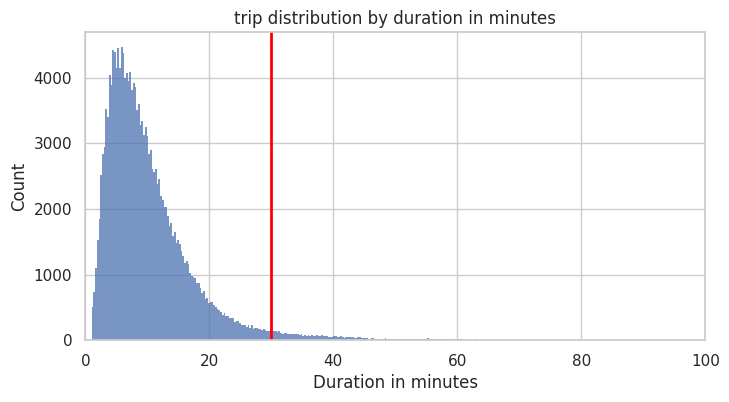

In [ ]:
# trip distribution by duration
plt.figure(figsize = (8, 4), dpi = 100)
sns.histplot(data = data, x = "duration_minute")
plt.xlim(0, 100)
plt.title("trip distribution by duration in minutes")
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
plt.axvline(x=30, color = "red")
plt.show()

In [ ]:
p_less_30min=len(data[data["duration_minute"] <= 30]) / len(data["duration_minute"]) * 100
p_more_60min=len(data[data["duration_minute"] > 60]) / len(data["duration_minute"]) * 100

print("less than 30 min : " + str(p_less_30min))
print("more than 60 min : " + str(p_more_60min))

less than 30 min : 96.30894264597595
more than 60 min : 0.9327187934655139


**By looking at the duration the trips took, we can see that most of them were less than 30 minutes 96 percent .While there is only a tiny 0.93 percent of trips that lasted more than 1 hour so we might consider the
0.93 as outliers**

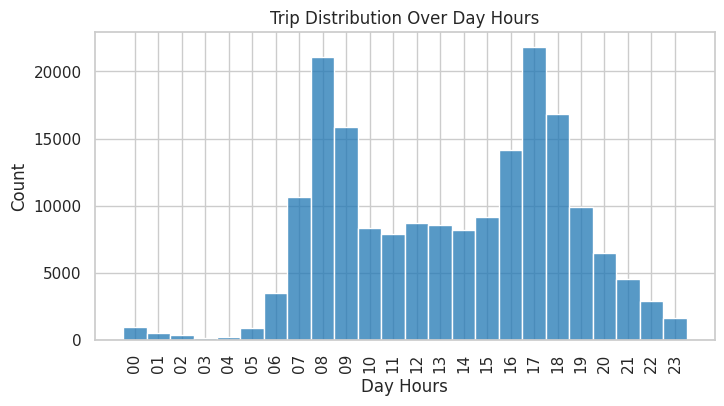

In [ ]:
plt.figure(figsize=(8, 4), dpi=100)

hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_categ = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
data['start_hourofday'] = data['start_hourofday'].astype(hour_categ)

sns.histplot(data=data, x="start_hourofday", color=base_color, bins=len(hour))
plt.title("Trip Distribution Over Day Hours")
plt.xlabel('Day Hours')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

** From the graph we can notice that peak hours are those from 7 - 9 am and from 4 - 6 pm. This might be related to the time when employees and students go to and leave work and school.**

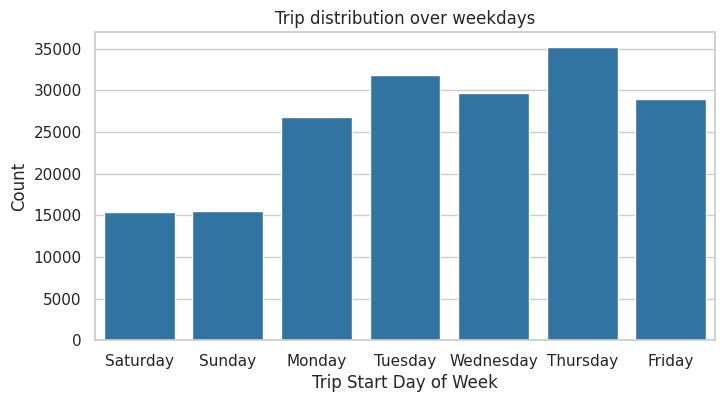

In [ ]:
# trip distribution over weekdays
plt.figure(figsize = (8,4), dpi = 100)

weekday = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
data['start_dayofweek'] = data['start_dayofweek'].astype(weekday_categ)

sns.countplot(data=data, x='start_dayofweek', color=base_color)
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays")

plt.show()

** its lowest levels on Saturday and Sunday. This is due to the fact that Saturday and Sunday are the weekend in the United States of America and the highest is thursday**

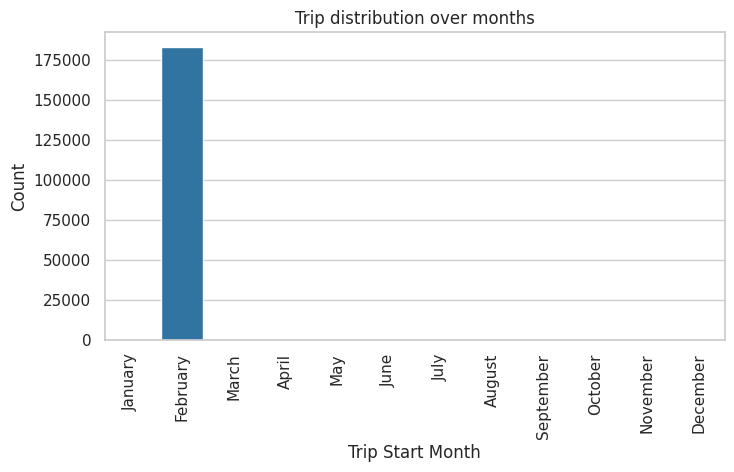

In [ ]:
# trip distribution over months
plt.figure(figsize = (8,4), dpi = 100)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_categ = pd.api.types.CategoricalDtype(ordered=True, categories=month)
data['start_month'] = data['start_month'].astype(month_categ)

sns.countplot(data=data, x='start_month', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Trip Start Month')
plt.ylabel('Count')

plt.title("Trip distribution over months")

plt.show()

**All trips have been taken place in the month of February or this data was collected from February only**

In [ ]:

station_counts = data['start_station_name'].value_counts()
most_crowded_stations = station_counts.head(5)
print(most_crowded_stations)

Market St at 10th St                                         4101
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3542
Berry St at 4th St                                           3051
Montgomery St BART Station (Market St at 2nd St)             2893
Powell St BART Station (Market St at 4th St)                 2760
Name: start_station_name, dtype: int64


Most Crowded stations are Shown in the graph

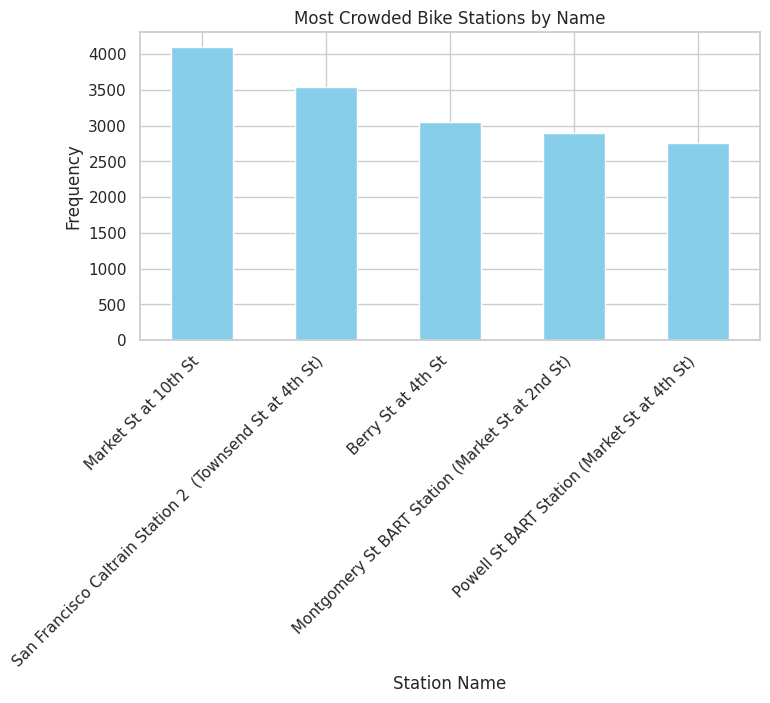

In [ ]:
plt.figure(figsize=(8, 4))
most_crowded_stations.plot(kind='bar', color='skyblue')
plt.title('Most Crowded Bike Stations by Name')
plt.xlabel('Station Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()


Most BikeShare Users are of age 30

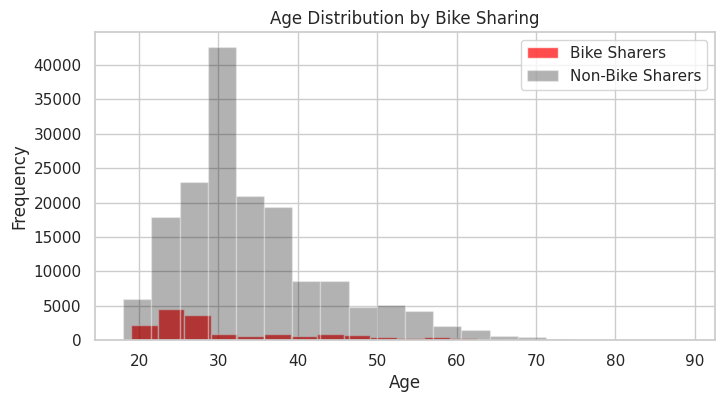

In [ ]:

# Create separate DataFrames for bike sharers and non-bike sharers
bike_sharers = data[data['bike_share_for_all_trip'] == 'Yes']
non_bike_sharers = data[data['bike_share_for_all_trip'] == 'No']

# Create histograms for age distribution of bike sharers and non-bike sharers
plt.figure(figsize=(8, 4))

plt.hist(bike_sharers['Age'], bins=20, color='red', alpha=0.7, label='Bike Sharers')
plt.hist(non_bike_sharers['Age'], bins=20, color='black', alpha=0.3, label='Non-Bike Sharers')

plt.title('Age Distribution by Bike Sharing')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.show()


I created a triproute col to show the most popular routes taken as shown in the graph

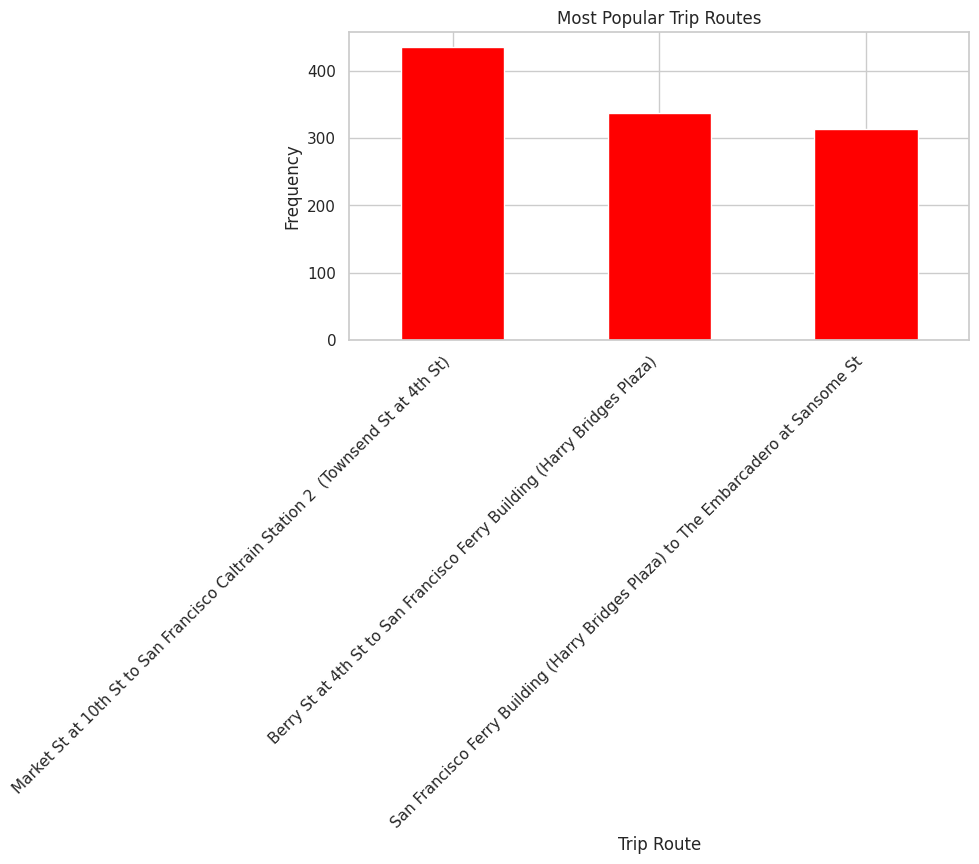

In [ ]:
data['trip_route'] = data['start_station_name'] + ' to ' + data['end_station_name']
trip_route_counts = data['trip_route'].value_counts()
most_popular_routes = trip_route_counts.head(3)
plt.figure(figsize=(8, 4))
most_popular_routes.plot(kind='bar', color='red')
plt.title('Most Popular Trip Routes')
plt.xlabel('Trip Route')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()

Most of our bike Sharers are males as shown

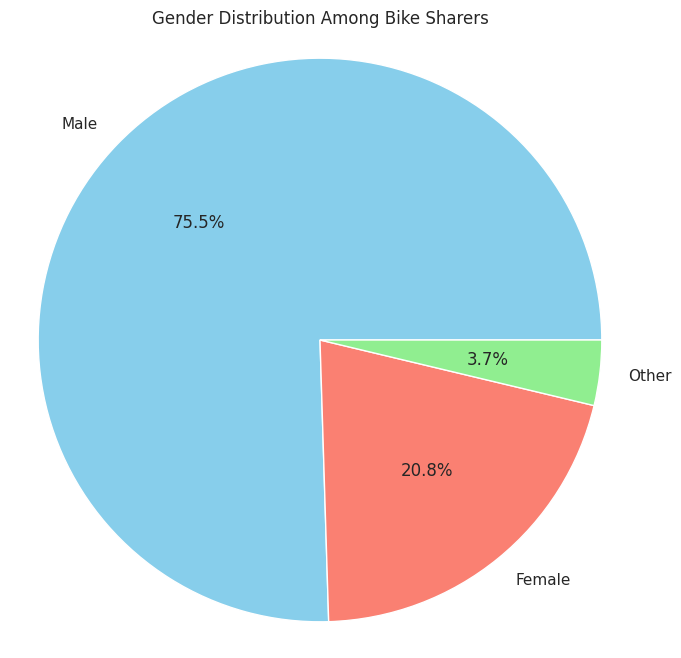

In [ ]:
bike_sharers = data[data['bike_share_for_all_trip'] == 'Yes']
gender_counts = bike_sharers['member_gender'].value_counts()
dominant_gender = gender_counts.idxmax()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Gender Distribution Among Bike Sharers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

As shown and the corr tends to 0 so there is no relation between age and duration

In [ ]:
"""# Filter the data for bike sharers
df_bike_sharers = data[data['bike_share_for_all_trip'] == 'Yes']

# Calculate the age of each bike sharer based on their birth year and the current year
current_year = pd.Timestamp.now().year
df_bike_sharers['age'] = current_year - df_bike_sharers['member_birth_year']

# Ensure that 'duration_sec' is in a numeric format
df_bike_sharers['duration_sec'] = pd.to_numeric(df_bike_sharers['duration_sec'])

# Calculate the correlation between age and ride duration
correlation = df_bike_sharers[['age', 'duration_sec']].corr()

##### Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the plot style

# Plot the data points
scatter = sns.scatterplot(x='age', y='duration_sec', data=df_bike_sharers, alpha=0.5)

# Add a regression line (trendline)
sns.regplot(x='age', y='duration_sec', data=df_bike_sharers, scatter=False, ax=scatter, color='skyblue')

plt.title('Age vs. Ride Duration Among Bike Sharers')
plt.xlabel('Age (years)')
plt.ylabel('Ride Duration (seconds)')

# Customize the plot aesthetics
sns.set_context("notebook", rc={"lines.linewidth": 2})  # Adjust line thickness
sns.despine()  # Remove the top and right spines

plt.show()
print(correlation)
"""

'# Filter the data for bike sharers\ndf_bike_sharers = data[data[\'bike_share_for_all_trip\'] == \'Yes\']\n\n# Calculate the age of each bike sharer based on their birth year and the current year\ncurrent_year = pd.Timestamp.now().year\ndf_bike_sharers[\'age\'] = current_year - df_bike_sharers[\'member_birth_year\']\n\n# Ensure that \'duration_sec\' is in a numeric format\ndf_bike_sharers[\'duration_sec\'] = pd.to_numeric(df_bike_sharers[\'duration_sec\'])\n\n# Calculate the correlation between age and ride duration\ncorrelation = df_bike_sharers[[\'age\', \'duration_sec\']].corr()\n\n##### Create a scatter plot to visualize the relationship\nplt.figure(figsize=(10, 6))\nsns.set(style="whitegrid")  # Set the plot style\n\n# Plot the data points\nscatter = sns.scatterplot(x=\'age\', y=\'duration_sec\', data=df_bike_sharers, alpha=0.5)\n\n# Add a regression line (trendline)\nsns.regplot(x=\'age\', y=\'duration_sec\', data=df_bike_sharers, scatter=False, ax=scatter, color=\'skyblue\')\n\n

\Highest ride duration average was in 2019-02-17

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183335 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183335 non-null  int64         
 1   start_time               183335 non-null  datetime64[ns]
 2   end_time                 183335 non-null  datetime64[ns]
 3   start_station_id         183335 non-null  object        
 4   start_station_name       183335 non-null  object        
 5   start_station_latitude   183335 non-null  float64       
 6   start_station_longitude  183335 non-null  float64       
 7   end_station_id           183335 non-null  object        
 8   end_station_name         183335 non-null  object        
 9   end_station_latitude     183335 non-null  float64       
 10  end_station_longitude    183335 non-null  float64       
 11  bike_id                  183335 non-null  object        
 12  user_type       

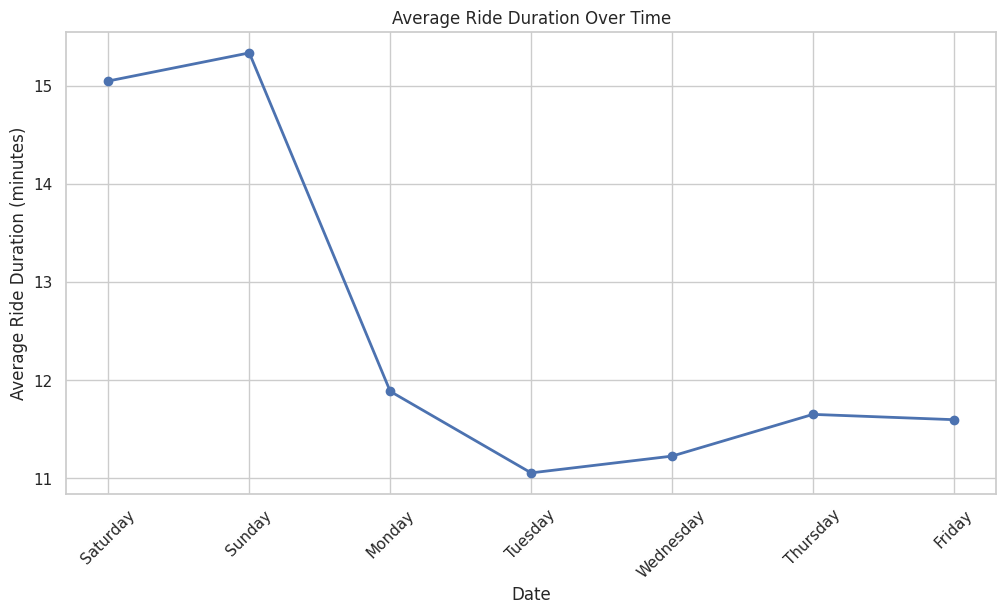

In [ ]:
# Group the data by a time interval (e.g., day) and calculate the mean ride duration
ride_duration_over_time = data.groupby(data['start_dayofweek'])['duration_minute'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(ride_duration_over_time.index, ride_duration_over_time.values, marker='o', linestyle='-')

plt.title('Average Ride Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Average Ride Duration (minutes)')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()


**This graph shows that on holidays, rides are longer, but there are fewer rides overall compared to regular days.**

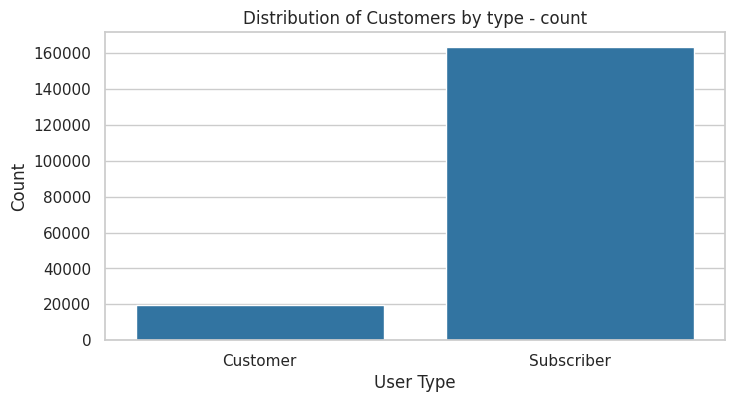

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

plot = sns.countplot(data=data, x='user_type', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title("Distribution of Customers by type - count")

plt.show()


Subscriber    89.16628
Customer      10.83372
Name: user_type, dtype: float64


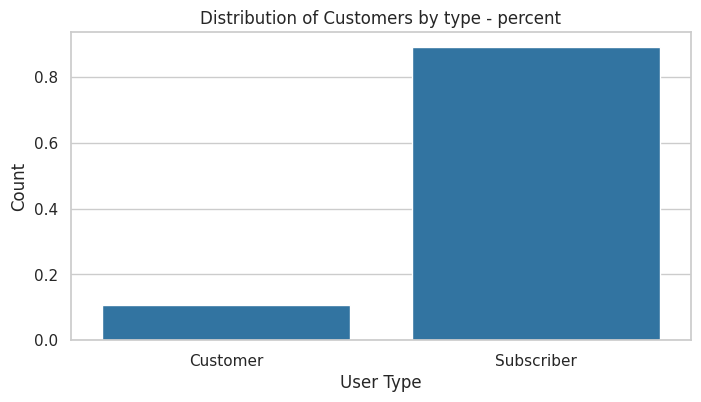

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

counts = data['user_type'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count')
print(counts * 100)

plt.title("Distribution of Customers by type - percent")
plt.show()

**Customers represent 10.8 percent of users, whereas subscribers represents 89.2 percent.**

In [ ]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,Age,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,trip_route
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,35.0,869.750000,2019-02-28,17,Thursday,February,Montgomery St BART Station (Market St at 2nd S...
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,1988.0,Male,No,31.0,708.683333,2019-02-28,18,Thursday,February,The Embarcadero at Steuart St to Berry St at 4...
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,47.0,1030.900000,2019-02-28,12,Thursday,February,Market St at Dolores St to Powell St BART Stat...
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,30.0,608.166667,2019-02-28,17,Thursday,February,Grove St at Masonic Ave to Central Ave at Fell St
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,45.0,26.416667,2019-02-28,23,Thursday,February,Frank H Ogawa Plaza to 10th Ave at E 15th St


In [ ]:
df1 = data[data["duration_minute"] <= 60]
df2 = df1[data["Age"] <= 80]

df2.head()

<ipython-input-321-8d91c212e63b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[data["Age"] <= 80]


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,Age,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,trip_route
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,45.0,26.416667,2019-02-28,23,Thursday,February,Frank H Ogawa Plaza to 10th Ave at E 15th St
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,60.0,29.883333,2019-02-28,23,Thursday,February,4th St at Mission Bay Blvd S to Broadway at Ke...
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,1983.0,Female,No,36.0,19.116667,2019-02-28,23,Thursday,February,Palm St at Willow St to San Jose Diridon Station
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,1989.0,Male,No,30.0,26.916667,2019-02-28,23,Thursday,February,Washington St at Kearny St to Valencia St at 2...
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,1988.0,Other,No,31.0,26.166667,2019-02-28,23,Thursday,February,Washington St at Kearny St to Valencia St at 2...


In [ ]:
df2["duration_minute"].describe()


count    181510.000000
mean         10.398485
std           7.491033
min           1.016667
25%           5.400000
50%           8.516667
75%          13.083333
max          59.933333
Name: duration_minute, dtype: float64

In [ ]:
df2["Age"].describe()


count    181510.000000
mean         33.979781
std           9.674575
min          18.000000
25%          27.000000
50%          31.000000
75%          38.000000
max          80.000000
Name: Age, dtype: float64

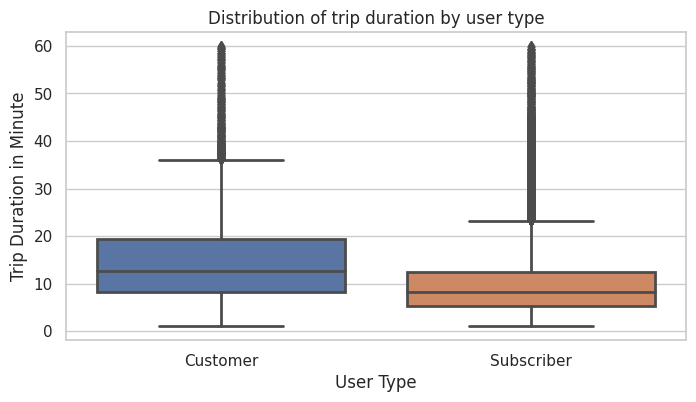

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

sns.boxplot(data = df2, x = "user_type", y = "duration_minute")
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute')

plt.title("Distribution of trip duration by user type")

plt.show()

**Subscribers have shorter trips, whearas casual riders (customers) have longer trips**

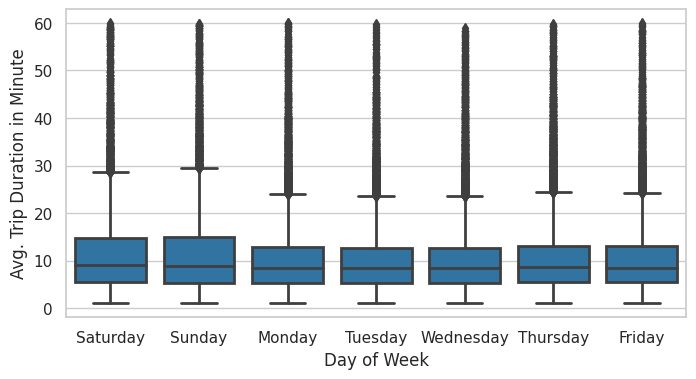

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

sns.boxplot(data = df2, x = "start_dayofweek", y = "duration_minute", color=base_color)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')

plt.show()

**In the holidays the trips are longer but the count of them are lower so its used for longer in the weekends**

There are way more subscribers than customers. Subscribers usage seem to be very consistent and standard, their usage is intended for daily routine such as work or study. Therfore subscribers usage reaches its highest levels during rush hours and work days. Customers on the other hand tend to use bikes for fun, their usage is concentrated during weekends at midnights and middays.

<ipython-input-327-5fabd38072fd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap = "viridis", annot = True)


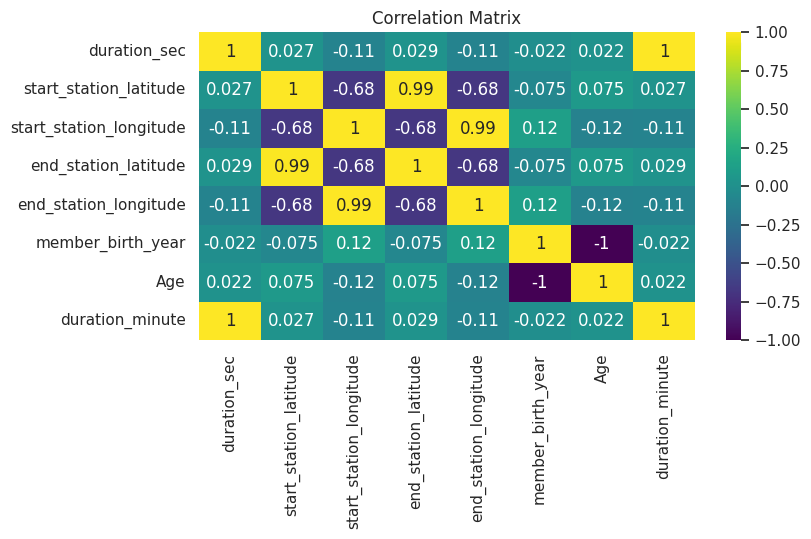

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

sns.heatmap(df2.corr(), cmap = "viridis", annot = True)
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

i found that i can do a corrleation matrix which can show me the dependencies of each column on each others the closer it is to 1 the higher the relation the lower the lower the relation

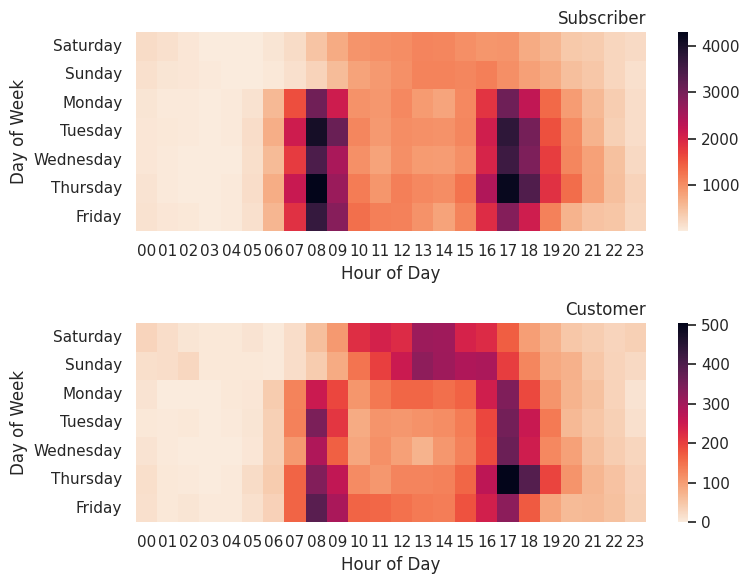

In [ ]:
plt.figure(figsize = (8,6), dpi = 100)

plt.subplot(2, 1, 1)
customers = df2[df2['user_type'] == "Subscriber"]
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(ct_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
customers = df2[df2['user_type'] == "Customer"]
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.tight_layout()

**A sub and customer heatmap that shows that there is a clear different usage pattern between customers and subscribers**

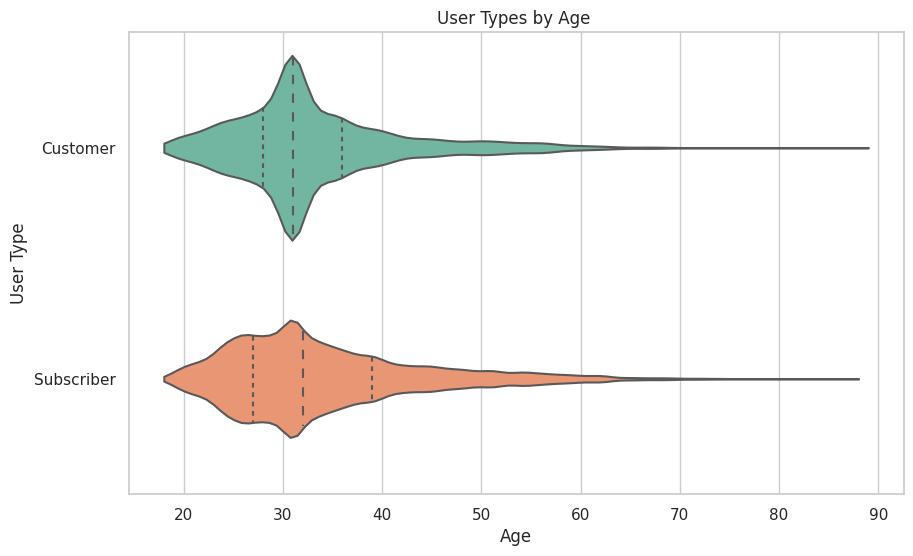

In [ ]:

# Create a bar chart to visualize the distribution of user types by age category
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the plot style

sns.violinplot(x='Age', y='user_type', data=data, palette='Set2', inner='quart', cut=0)

plt.title('User Types by Age ')
plt.xlabel('Age')
plt.ylabel('User Type')
plt.xticks(rotation=0)

plt.show()


More customers are of age 30

Bike sharing is for subs only but not all subs use it

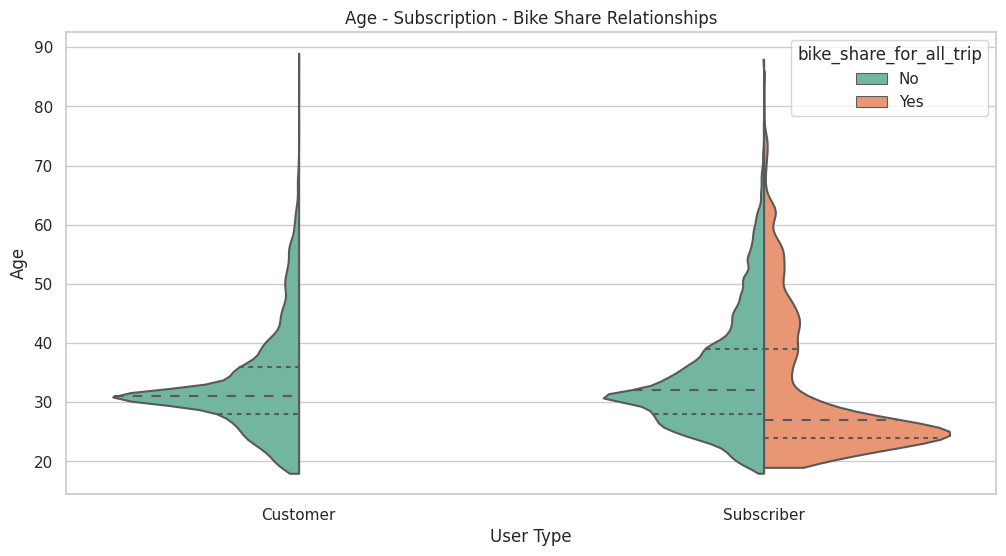

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set the plot style

palette = {'Subscriber': 'red', 'Customer': 'blue'}
sns.violinplot(x='user_type', y='Age', hue='bike_share_for_all_trip', data=data, palette="Set2", inner='quart', cut=0, split=True)

plt.title('Age - Subscription - Bike Share Relationships')
plt.xlabel('User Type')
plt.ylabel('Age')
plt.xticks(rotation=0)

#plt.legend(title='Bike Share', loc='upper right', labels=['No', 'Yes'])

plt.show()

**This graph might be irrelevant but i wanted to make sure again that subs only used bike share**

# Insights

insights all of them are under each graph or code that i got the insight from:

*   Most trips goes around Berry St and San francisco Harry Bridges
*   Most Bikesharers are of age 30
*   Most stations used are Market St at 10th St , San Francisco Caltrain Station 2  (Townsend St at 4th St) And Berry St at 4th St
*   Most Bike Sharers are males
* as shown from the correlation which tends to 0 there is no relation between age and Ride Duration
*   Highest ride duration average was 2019-02-17 we can look at that date
*   Age dosent affect share duration
*   as Age changes subscription changes from the violin plot above at 30 there is more customres than subscribers
* Bike sharing is for subs only but not all subs use it



1.   Over 96% of trips lasted less than 30 minutes. Only 0.93% of trips exceeded 1 hour, which we considered outliers and removed for further analysis.
2.   Peak hours for trips are 7-9 am and 4-6 pm, likely due to the commute times of employees and students on workdays.

3. The age distribution is typical, skewed to the right, with the most active riders aged 20-45.

4. Customers make up 10.8% of users, while subscribers make up 89.2%.

5. 75.7% of users are males, 22.3% are females, and 1.99% fall into other categories.





**Suggestions based on some of the anaylsis**

**Tailor marketing to age 30+ for better resonance.**

**Expand stations in high-demand areas.**

**Enhance station amenities for a better user experience.**

**Launch campaigns to attract more female riders.**

**Promote the service as age-neutral.**

**Offer flexible subscription plans.**

**Market biking as an efficient commute during peak hours.**

**Improve customer support and loyalty programs.**

**Address trips exceeding one hour with policies or pricing.**

More details
Certainly! Here are concise suggestions based on your insights:

1. **Target Age 30+**: Focus marketing efforts on the 30+ age group to align promotions with their preferences.

2. **Improve High-Demand Stations**: Invest in additional stations around Berry St and San Francisco Harry Bridges to reduce congestion.

3. **Enhance Station Amenities**: Improve signage and amenities at popular stations for a better user experience.

4. **Promote Gender Diversity**: Launch campaigns to attract more female riders and make biking more inclusive.

5. **Age-Neutral Marketing**: Promote the service as suitable for all age groups due to the lack of age-ride duration correlation.

6. **Flexible Subscriptions**: Offer subscription plans catering to different age groups' preferences and needs.

7. **Utilize Peak Hours Data**: Market biking as an efficient commuting solution during peak hours.

8. **Enhance Customer Experience**: Improve customer support and loyalty programs to retain and attract more customers.

9. **Address Outliers**: Implement policies or pricing for trips exceeding one hour, addressing the 0.93% outlier trips.

These succinct suggestions can guide Ford GoBike in optimizing its service and attracting a diverse range of users.

------

# Testing

In [ ]:
#Testing codes for heat maps on the intrent XD
"""
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

# Get the locations from the data frame
start_lats = data['start_station_latitude']
start_lons = data['start_station_longitude']
end_lats = data['end_station_latitude']
end_lons = data['end_station_longitude']

# Define the grid for the heatmap
lon_bins = np.linspace(start_lons.min(), start_lons.max(), 100)
lat_bins = np.linspace(start_lats.min(), start_lats.max(), 100)

# Compute the density for the start stations
density_start, _, _ = np.histogram2d(start_lats, start_lons, [lat_bins, lon_bins])
density_start = gaussian_filter(density_start, 1)

# Compute the density for the end stations
density_end, _, _ = np.histogram2d(end_lats, end_lons, [lat_bins, lon_bins])
density_end = gaussian_filter(density_end, 1)

# Plot the heatmap for start stations
plt.imshow(density_start.T, origin='lower', extent=[lon_bins[0], lon_bins[-1], lat_bins[0], lat_bins[-1]], cmap='hot')
plt.title('Start Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot the heatmap for end stations
plt.imshow(density_end.T, origin='lower', extent=[lon_bins[0], lon_bins[-1], lat_bins[0], lat_bins[-1]], cmap='hot')
plt.title('End Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
"""

In [ ]:
# Testing didnt go well
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

data['distance_km'] = data.apply(lambda row: haversine(
    row['start_station_latitude'],
    row['start_station_longitude'],
    row['end_station_latitude'],
    row['end_station_longitude']
), axis=1)

# Calculate the average distance
average_distance = data['distance_km'].mean()

# Visualize the average distance
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='distance_km', color='skyblue')
plt.title('Distribution of Distances Between Start and End Stations')
plt.ylabel('Distance (km)')

plt.show()
"""

In [ ]:
# Testing didnt go well
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

# Calculate distances and add a new column to the DataFrame
data['distance_km'] = data.apply(lambda row: haversine(
    row['start_station_latitude'],
    row['start_station_longitude'],
    row['end_station_latitude'],
    row['end_station_longitude']
), axis=1)

# Find the longest distance
max_distance = data['distance_km'].max()

# Visualize the longest distance
plt.figure(figsize=(8, 6))
plt.plot(['Longest Distance'], [max_distance], marker='o', color='skyblue')
plt.title('Longest Distance Between Start and End Stations')
plt.ylabel('Distance (km)')
plt.grid(True)

plt.show()

"""

In [ ]:
#testing didnt go well either
"""
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import HTML

m = folium.Map(location=[data['start_station_latitude'].mean(), data['start_station_longitude'].mean()], zoom_start=13)

# Extract latitude and longitude coordinates for both start and end stations
start_heat_data = [[row['start_station_latitude'], row['start_station_longitude']] for index, row in data.iterrows()]
end_heat_data = [[row['end_station_latitude'], row['end_station_longitude']] for index, row in data.iterrows()]

# Create heatmap layers for both start and end stations
HeatMap(start_heat_data, name='Start Stations Heatmap').add_to(m)
HeatMap(end_heat_data, name='End Stations Heatmap').add_to(m)

# Add layer control to switch between start and end station heatmaps
folium.LayerControl().add_to(m)

# Display the map in the notebook
HTML(m._repr_html_())
"""